# Covid-19 Vaccines Trendline

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Covid-19 Vaccines
title = "COVID-19"
symbols = ['BNTX', 'JNJ', 'MRNA', 'PFE']
start = '2020-01-01'
end = '2022-09-03'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
sns.set()

In [5]:
df.head()

,BNTX,JNJ,MRNA,PFE
Date,,,,
2020-01-02 00:00:00-05:00,37.996727,135.936539,19.230000,33.538967
2020-01-03 00:00:00-05:00,39.526466,134.362701,18.889999,33.359016
2020-01-06 00:00:00-05:00,43.997250,134.195084,18.129999,33.316170
2020-01-07 00:00:00-05:00,42.773460,135.014603,17.780001,33.204784
2020-01-08 00:00:00-05:00,44.510452,134.995956,17.980000,33.470417


In [6]:
df.tail()

,BNTX,JNJ,MRNA,PFE
Date,,,,
2022-08-29 00:00:00-04:00,144.630005,163.000000,137.259995,46.230000
2022-08-30 00:00:00-04:00,147.080002,162.429993,135.929993,45.849998
2022-08-31 00:00:00-04:00,144.639999,161.339996,132.270004,45.230000
2022-09-01 00:00:00-04:00,147.809998,165.339996,138.949997,46.630001
2022-09-02 00:00:00-04:00,147.899994,162.740005,138.570007,45.700001


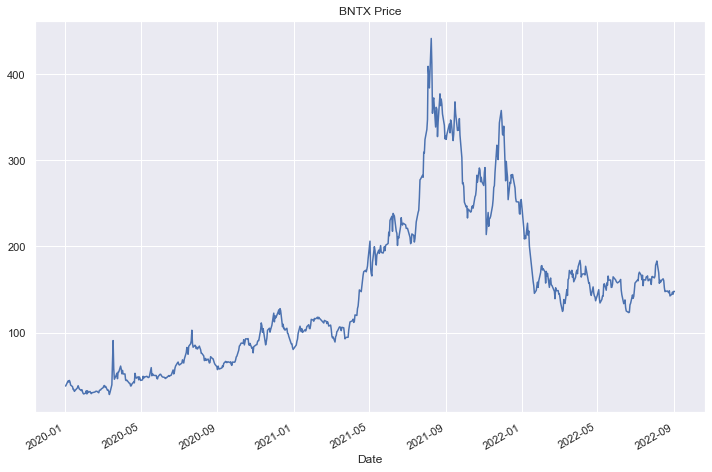

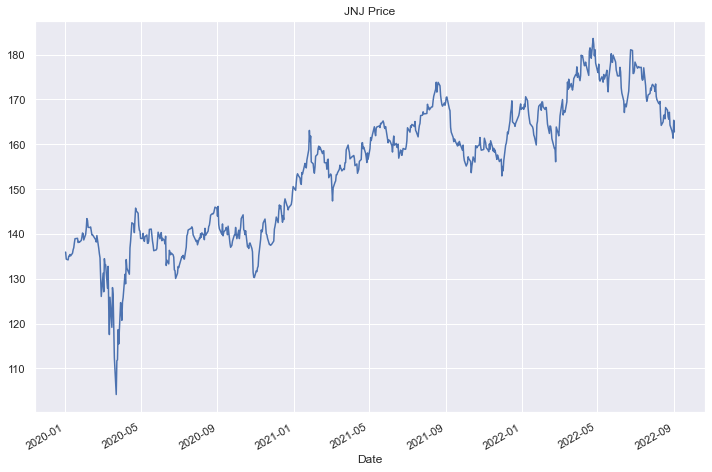

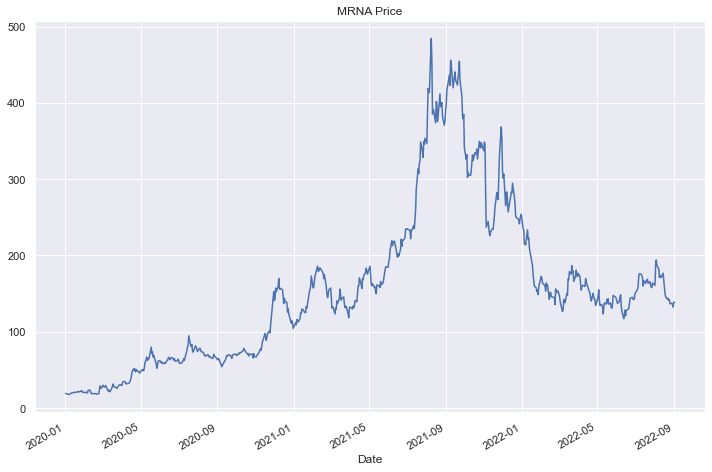

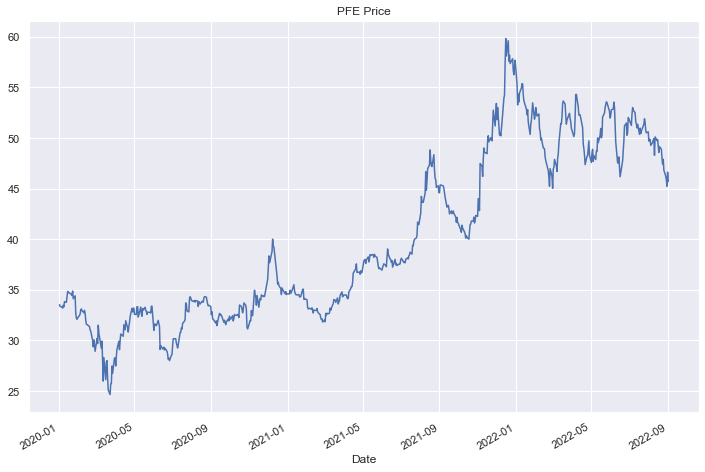

In [7]:
for s in df.columns:
    df[s].plot(figsize=(12,8))
    plt.title(s + " Price")
    plt.show()

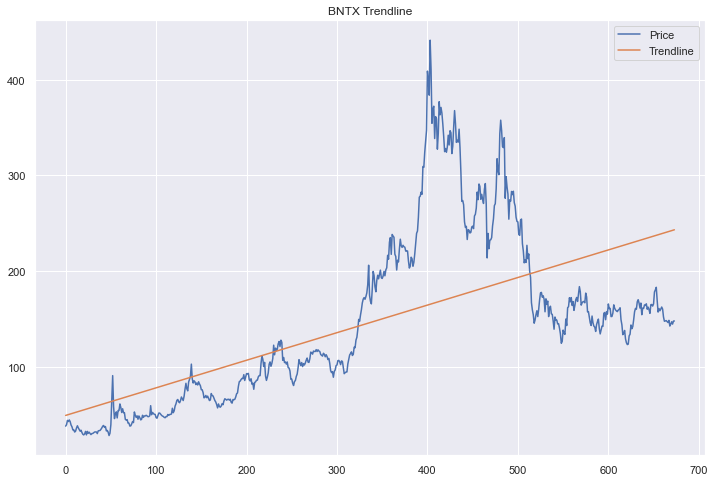

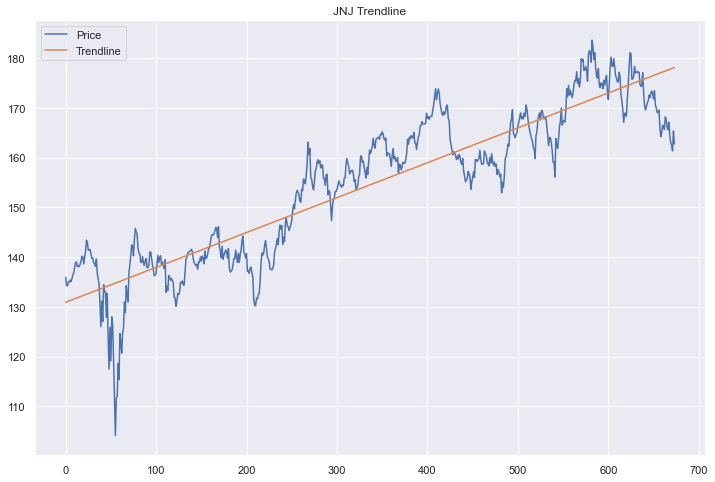

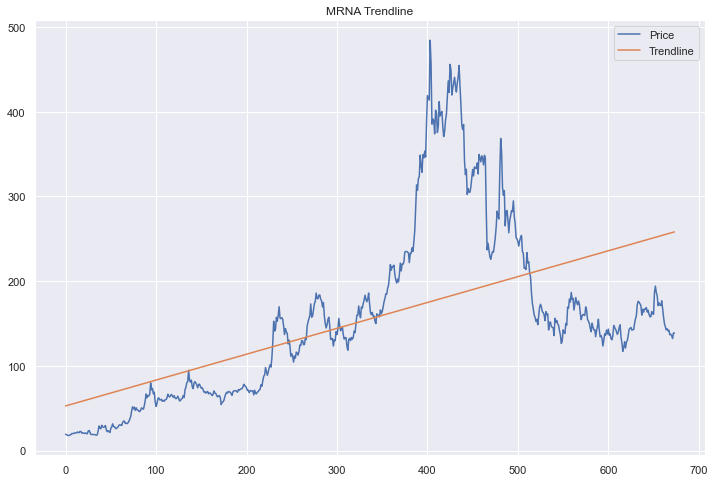

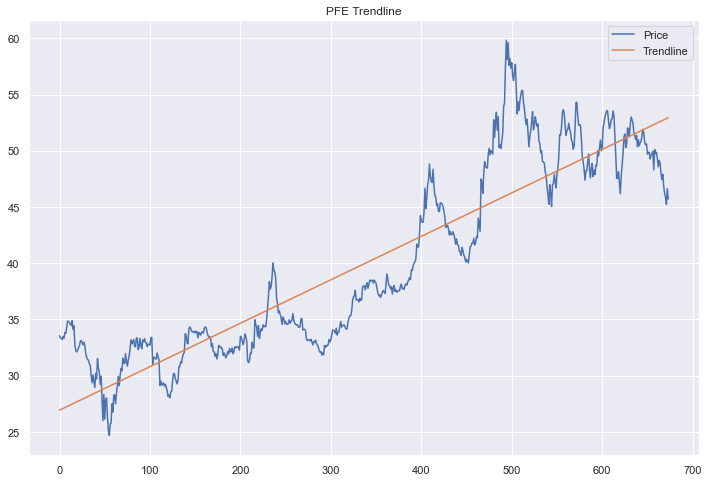

In [8]:
for s in df.columns:
    coefficients, residuals, _, _, _ = np.polyfit(range(len(df[s].index)), df[s],1, full=True)
    plt.figure(figsize=(12,8))
    plt.plot(df[s].values, label='Price')
    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df))], label='Trendline')
    plt.title( s + ' Trendline')
    plt.legend(loc='best')
    plt.show()